## sog stats

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import seaborn as sns
import matplotlib.colors as mcolors
import glob
import os
import xarray as xr
import datetime
from salishsea_tools import viz_tools, tidetools, geo_tools, gsw_calls, wind_tools
import pickle
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from sys import platform

%matplotlib inline

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# user inputs

fs = 48 #fontsize
line_color = 'darkblue'
line_width = 3

if platform == 'darwin':
    results_dir = '/Users/rmueller/Projects/'
elif platform == 'linux':
    results_dir = '/home/rmueller/Projects/MIDOSS/results/graphics/'
    
# print to file flag: [0] Don't save figure, [1] Save figure    
print_to_file = 1 

In [4]:
wind_grid = nc.Dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaAtmosphereGridV1')

In [5]:
geo_tools.find_closest_model_point(-123.67, 49.21, wind_grid['longitude'][:]-360, wind_grid['latitude'][:],
                                   grid = 'GEM2.5')

(143, 141)

In [6]:
wind_data = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')

In [7]:
time_slice1 = slice('2015-01-01 00:00:00', '2015-06-30 23:30:00')
time_slice2 = slice('2015-07-01 00:00:00', '2015-12-31 23:30:00')
time_slice3 = slice('2016-01-01 00:00:00', '2016-06-30 23:30:00')
time_slice4 = slice('2016-07-01 00:00:00', '2016-12-31 23:30:00')
time_slice5 = slice('2017-01-01 00:00:00', '2017-06-30 23:30:00')
time_slice6 = slice('2017-07-01 00:00:00', '2017-12-31 23:30:00')
time_slice7 = slice('2018-01-01 00:00:00', '2018-06-30 23:30:00')
time_slice8 = slice('2018-07-01 00:00:00', '2018-12-31 23:30:00')

u_winds1 = wind_data.u_wind.isel(gridY=143, gridX=141).sel(time=time_slice1).data
v_winds1 = wind_data.v_wind.isel(gridY=143, gridX=141).sel(time=time_slice1).data
print('Done slicing time_slice1')
u_winds2 = wind_data.u_wind.isel(gridY=143, gridX=141).sel(time=time_slice2).data
v_winds2 = wind_data.v_wind.isel(gridY=143, gridX=141).sel(time=time_slice2).data
print('Done slicing time_slice2')

Done slicing time_slice1
Done slicing time_slice2


In [8]:
u_winds3 = wind_data.u_wind.isel(gridY=143, gridX=141).sel(time=time_slice3).data
v_winds3 = wind_data.v_wind.isel(gridY=143, gridX=141).sel(time=time_slice3).data
print('Done slicing time_slice3')
u_winds4 = wind_data.u_wind.isel(gridY=143, gridX=141).sel(time=time_slice4).data
v_winds4 = wind_data.v_wind.isel(gridY=143, gridX=141).sel(time=time_slice4).data
print('Done slicing time_slice4')
u_winds5 = wind_data.u_wind.isel(gridY=143, gridX=141).sel(time=time_slice5).data
v_winds5 = wind_data.v_wind.isel(gridY=143, gridX=141).sel(time=time_slice5).data
print('Done slicing time_slice5')
u_winds6 = wind_data.u_wind.isel(gridY=143, gridX=141).sel(time=time_slice6).data
v_winds6 = wind_data.v_wind.isel(gridY=143, gridX=141).sel(time=time_slice6).data
print('Done slicing time_slice6')
u_winds7 = wind_data.u_wind.isel(gridY=143, gridX=141).sel(time=time_slice7).data
v_winds7 = wind_data.v_wind.isel(gridY=143, gridX=141).sel(time=time_slice7).data
print('Done slicing time_slice7')
u_winds8 = wind_data.u_wind.isel(gridY=143, gridX=141).sel(time=time_slice8).data
v_winds8 = wind_data.v_wind.isel(gridY=143, gridX=141).sel(time=time_slice8).data
print('Done slicing time_slice8')

Done slicing time_slice3
Done slicing time_slice4
Done slicing time_slice5
Done slicing time_slice6
Done slicing time_slice7
Done slicing time_slice8


In [9]:
u_winds = np.concatenate((u_winds1, u_winds2, u_winds3, u_winds4, u_winds5, u_winds6, u_winds7, u_winds8), axis=0)
v_winds = np.concatenate((v_winds1, v_winds2, v_winds3, v_winds4, v_winds5, v_winds6, v_winds7, v_winds8), axis=0)

In [10]:
wind_speed, wind_dir = wind_tools.wind_speed_dir(u_winds, v_winds)

In [11]:
wnd_dir_avg = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    wnd_dir_avg = np.append(wnd_dir_avg, wind_dir[start:end].mean())

In [12]:
wnd_spd_avg = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    wnd_spd_avg = np.append(wnd_spd_avg, wind_speed[start:end].mean())

In [13]:
time_slice = slice('2015-01-01 00:00:00', '2018-12-31 23:30:00')
wind_time = wind_data.time.sel(time=time_slice).data

### Salinity


In [14]:
salinity = xr.open_dataset("https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DTracerFields1hV19-05")
times_salinity = salinity.time.sel(time = salinity.time.dt.year.isin([2015,2016,2017,2018])).values.astype('datetime64[s]').astype(datetime.datetime)

In [15]:
#locs = ['sog', 'salmon', 'turn']
locs = ['sog']
for loc in locs:
    for year in [2015, 2016, 2017, 2018]:
        fname = "/home/abhudia/Desktop/salinity/3points/{}{}.pickle".format(loc, str(year))
        file = open(fname, "rb")
        locals()[loc + "sal" + str(year)] = pickle.load(file)
        locals()["tsal" + str(year)] = []
        for time in times_salinity: 
            if time.year == year:
                locals()["tsal" + str(year)].append(time)

In [16]:
sogtsal = np.concatenate([tsal2015, tsal2016, tsal2017, tsal2018])
sogsal= np.concatenate([sogsal2015, sogsal2016, sogsal2017, sogsal2018])

In [17]:
sal_avg = np.array([])
sal_avg_t = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    sal_avg = np.append(sal_avg, sogsal[start:end].mean())
    sal_avg_t = np.append(sal_avg_t, sogtsal[start + 84])

### current speed

In [18]:
pickle_in1 = open("/home/abhudia/Desktop/current speed/hourly/mag2015.pickle","rb")
pickle_in2 = open("/home/abhudia/Desktop/current speed/hourly/mag2016.pickle","rb")
pickle_in3 = open("/home/abhudia/Desktop/current speed/hourly/mag2017.pickle","rb")
example1 = pickle.load(pickle_in1)
print('Done loading pickle 1')
example2 = pickle.load(pickle_in2)
print('Done loading pickle 2')
example3 = pickle.load(pickle_in3)
print('Done loading pickle 3')

Done loading pickle 1
Done loading pickle 2
Done loading pickle 3


In [19]:
# I am working with the first three and adding the fourth later to avoid memory error
two = np.append(example1[:,274,242], example2[:,274,242])
three = np.append(two, example3[:,274,242])
del example1 
del example2 
del example3

In [20]:
# keep loading
pickle_in4 = open("/home/abhudia/Desktop/current speed/hourly/mag2018.pickle","rb")
example4 = pickle.load(pickle_in4)
print('Done loading pickle 4')
fullc = np.append(three, example4[:,274,242])
fullc.shape

Done loading pickle 4


(35064,)

In [21]:
cur_avg = np.array([])

for i in range(1450):
    start = 24*i
    end = start + 168
    cur_avg = np.append(cur_avg, fullc[start:end].mean())

In [22]:
dates = np.array([datetime.date(2015,1,1) + datetime.timedelta(i) for i in range(1450)])
dates.shape

(1450,)

In [23]:
dates_raw = np.array([datetime.date(2015,1,1) + datetime.timedelta(i/24) for i in range(fullc.size)])
dates_raw.shape

(35064,)

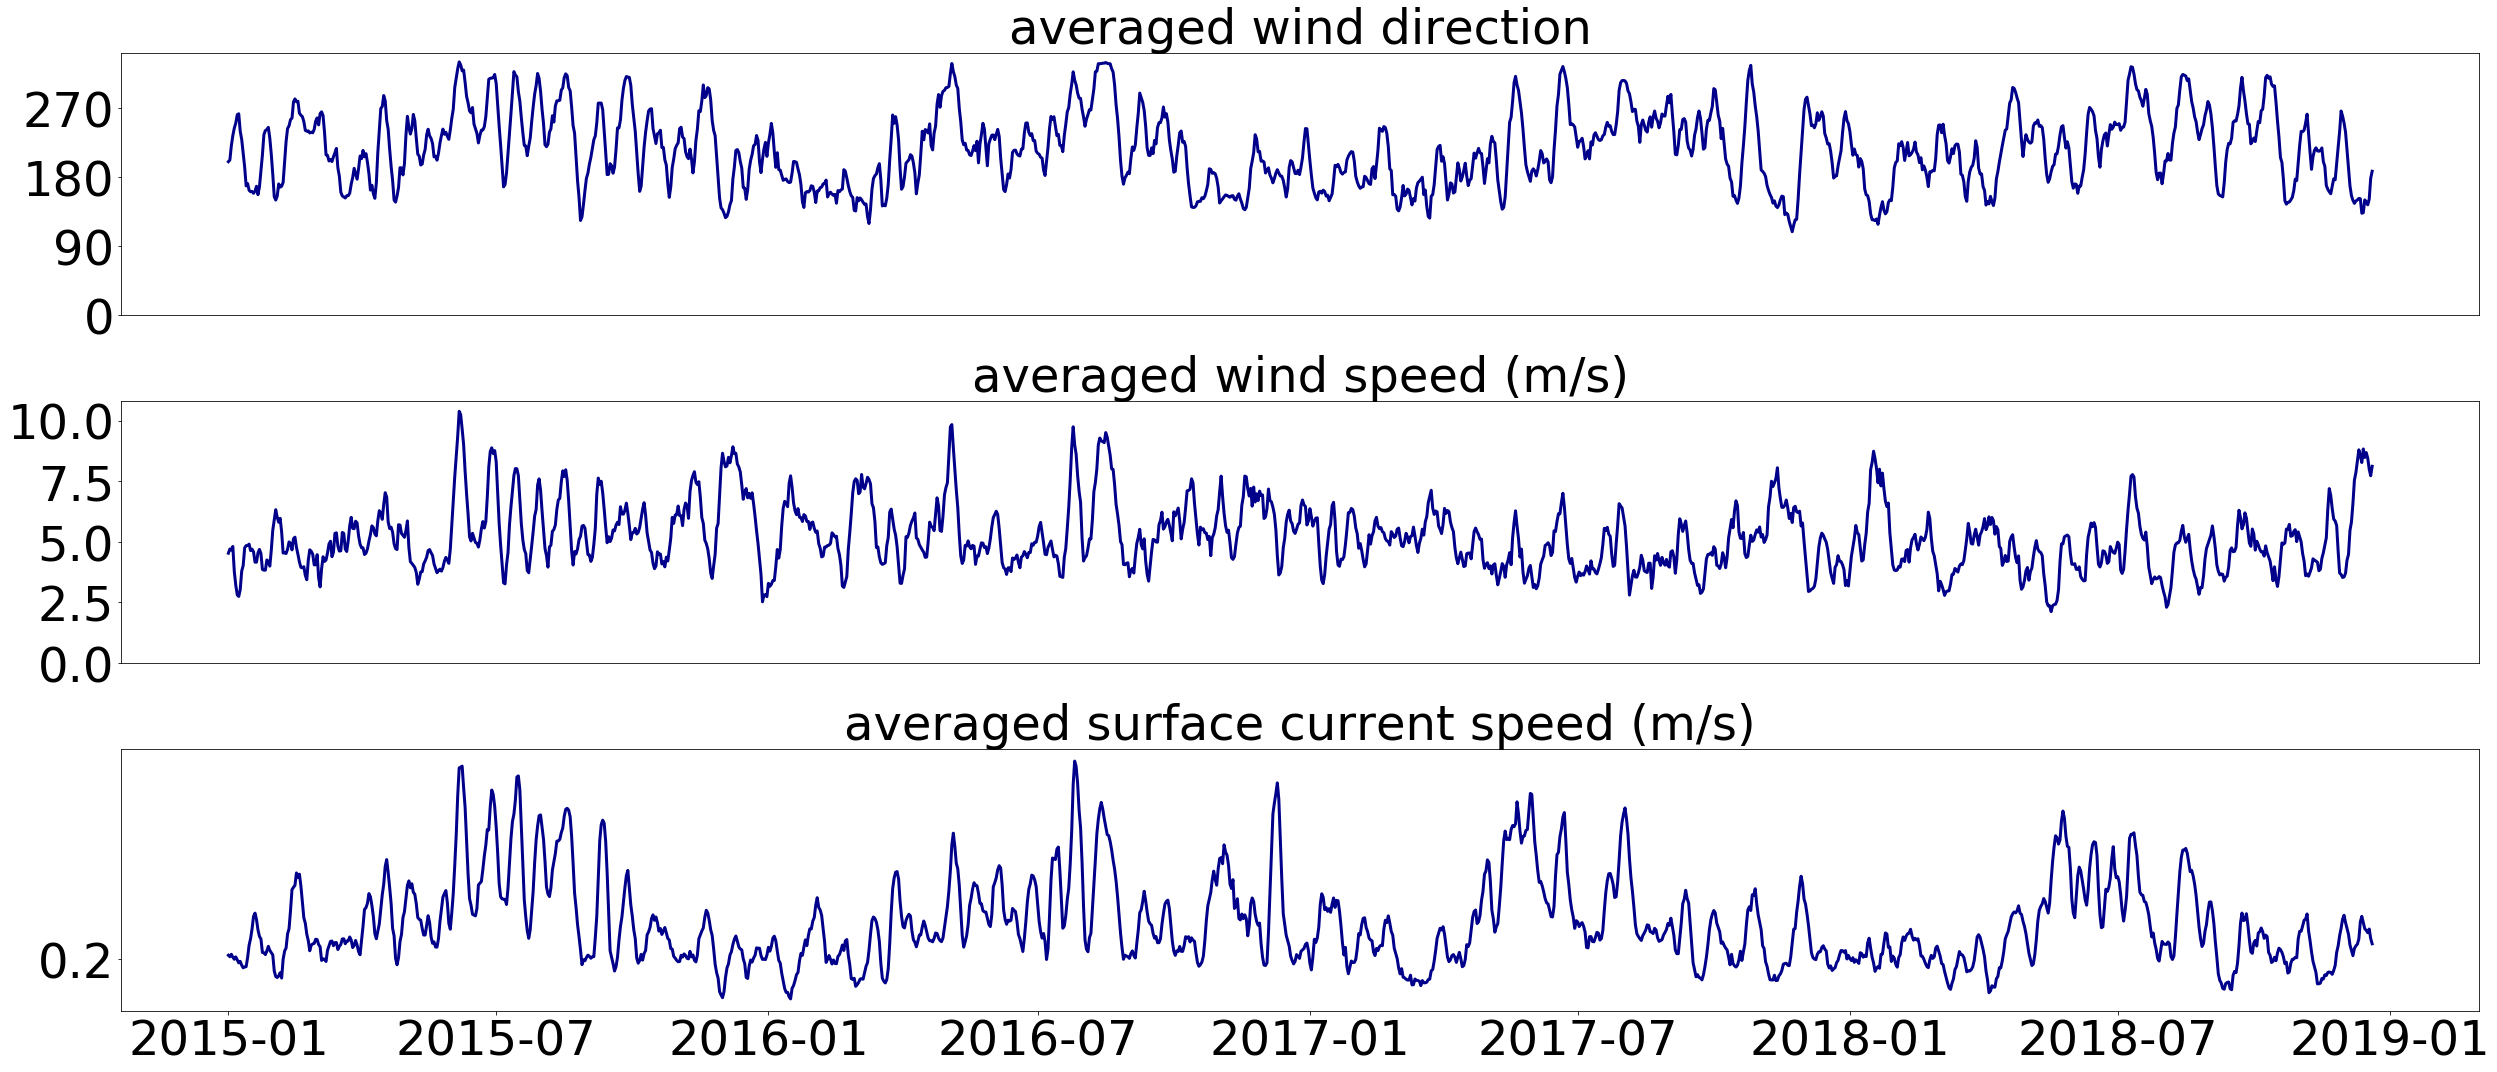

In [24]:
fig, ax = plt.subplots(3,1, figsize = (35,15))
ax[0].plot(dates, wnd_dir_avg, color = line_color, linewidth = line_width)
ax[0].set_title('averaged wind direction', fontsize = fs)
ax[0].set_xticks([])
ax[0].tick_params(labelsize=fs)
ax[0].set_yticks(np.arange(0, 360, step=90))

#ax[0].hlines(fulls.mean(), dates[0], dates[-1])

ax[1].plot(dates,wnd_spd_avg, color = line_color, linewidth = line_width)
#ax[1].hlines(fullc.mean(), dates[0], dates[-1])
ax[1].set_title('averaged wind speed (m/s)', fontsize = fs)
ax[1].set_xticks([])
ax[1].tick_params(labelsize=fs)
ax[1].set_yticks(np.arange(0, 12, step=2.5))

ax[2].plot(dates,cur_avg, color = line_color, linewidth = line_width)
ax[2].set_title('averaged surface current speed (m/s)', fontsize = fs)
ax[2].tick_params(labelsize=fs)
ax[2].set_yticks(np.arange(0.2, 0.6, step=2))
#ax[2].hlines(full.mean(), dates[0], dates[-1])
# for ax in ax:
#     ax.set_xlim(dates[0], dates[-1])
#     ax.axvline(datetime.date(2017,8,1), color='r', ls='--')
#     ax.axvline(datetime.date(2017,1,1), color='r', ls='--');
#     ax.axvline(datetime.date(2015,6,5), color='r', ls='--');
#     ax.axvline(datetime.date(2018,1,15), color='r', ls='--');
#     ax.axvline(datetime.date(2017,6,15), color='r', ls='--');
#     ax.axvline(datetime.date(2017,11,21), color='r', ls='--');
#     for tick in ax.xaxis.get_major_ticks():
#             tick.label.set_fontsize(24); 
#     for tick in ax.yaxis.get_major_ticks():
#             tick.label.set_fontsize(24); 
            
plt.tight_layout()
fig.savefig(results_dir + 'salmon_choices.png', bbox_inches='tight', dpi = 600);
#fig.savefig('/home/vdo/Pictures/salmon-choices.png', bbox_inches='tight');

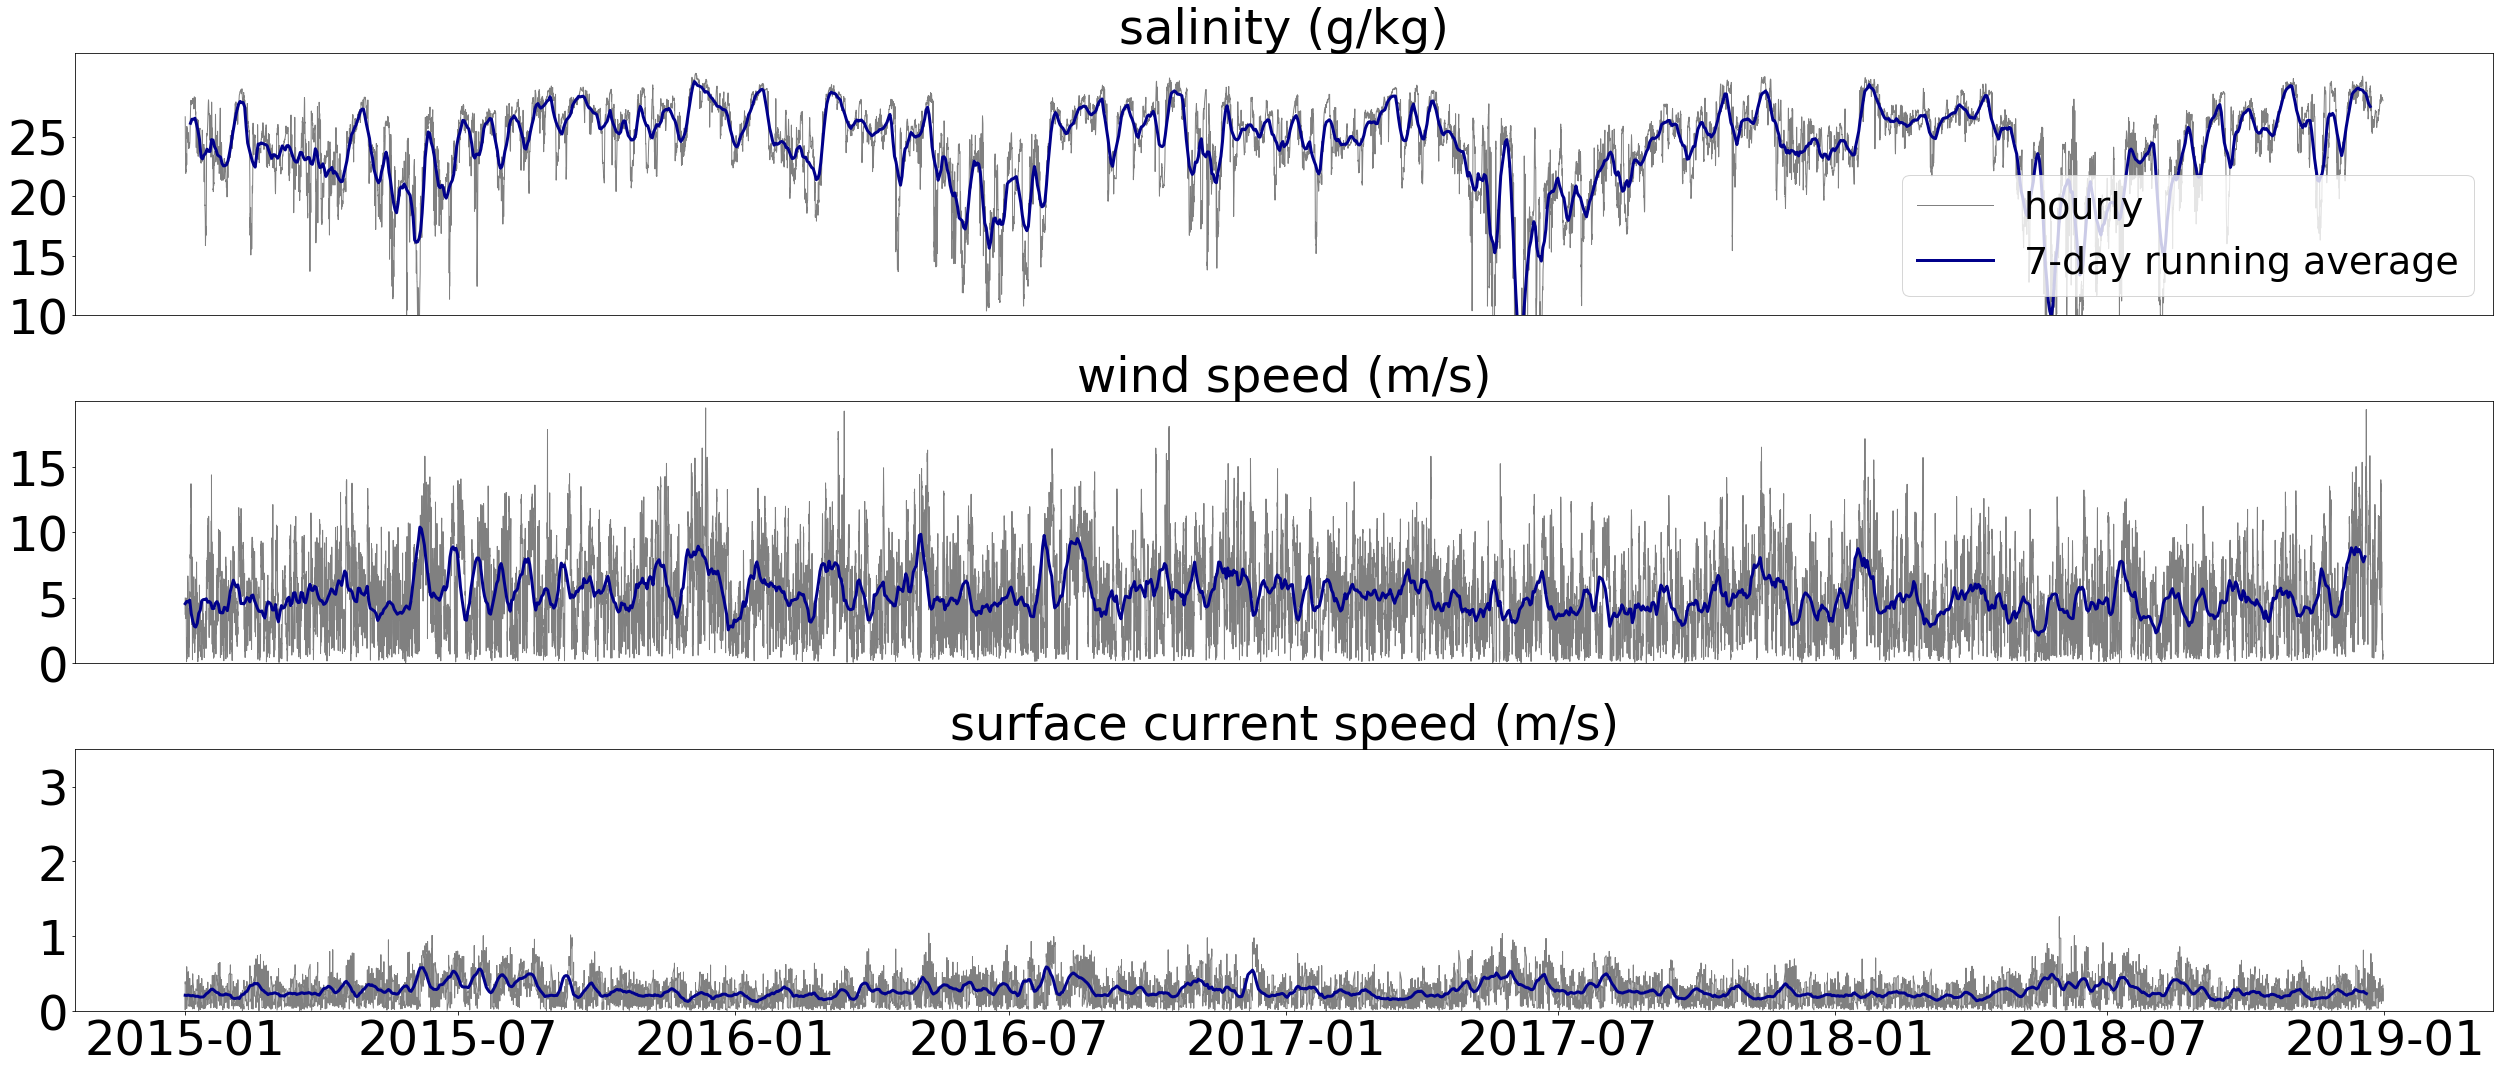

In [25]:
fig, ax = plt.subplots(3,1, figsize = (35,15))
ax[0].plot(sogtsal, sogsal, color = 'grey', linewidth = 1)
ax[0].plot(sal_avg_t, sal_avg, color = line_color, linewidth = line_width)
#ax[0].plot(dates, wnd_dir_avg, color = line_color, linewidth = line_width)
ax[0].set_title('salinity (g/kg)', fontsize = fs)
ax[0].legend(['hourly','7-day running average'],loc='lower right',fontsize=38)
ax[0].set_xticks([])
ax[0].set_ylim(10,32)
ax[0].tick_params(labelsize=fs)
ax[0].set_yticks(np.arange(10, 30, step=5))

#ax[0].hlines(fulls.mean(), dates[0], dates[-1])

ax[1].plot(wind_time, wind_speed, color = 'grey', linewidth = 1)
ax[1].plot(dates,wnd_spd_avg, color = line_color, linewidth = line_width)
#ax[1].hlines(fullc.mean(), dates[0], dates[-1])
ax[1].set_title('wind speed (m/s)', fontsize = fs)
ax[1].set_xticks([])
ax[1].set_ylim(0,20)
ax[1].tick_params(labelsize=fs)
ax[1].set_yticks(np.arange(0, 20, step=5))

ax[2].plot(dates_raw, fullc, color='grey',linewidth=1)
ax[2].plot(dates,cur_avg, color = line_color, linewidth = line_width)
ax[2].set_title('surface current speed (m/s)', fontsize = fs)
ax[2].tick_params(labelsize=fs)
ax[2].set_ylim(0,3.5)
ax[2].set_yticks(np.arange(0, 3.5, step=1.0))
#ax[2].set_xticks([],['1'],['2'],['3'])
#ax[2].hlines(full.mean(), dates[0], dates[-1])

for ax in ax:
    for tick in ax.xaxis.get_major_ticks():
        if tick == 2:
            tick.label.set_fontsize(fs); 
    for tick in ax.yaxis.get_major_ticks():
        if tick == 2:
            tick.label.set_fontsize(fs); 

#labels = [item.get_text() for item in ax[1].get_xticklabels()]
#ax[1].set_xticklabels(['']*len(labels))

plt.tight_layout()
fig.savefig(results_dir + 'sog_stats_wdaily.png', bbox_inches='tight', dpi = 600);